# Binary Classification
In this example, we will walk through two-category classification problem.

The following contents will be covered:
1. 


## Load Raw Data


In [1]:
from sklearn.datasets import make_moons
import numpy as np
X, y = make_moons(n_samples=1024, noise=0.2, random_state=3321)
print(X.shape, y.shape)
print(X[:10])
print(y[:10])

(1024, 2) (1024,)
[[-0.86691851 -0.32027284]
 [ 1.70922817 -0.66094909]
 [ 0.95477398  0.28453102]
 [ 0.14465106  0.33336045]
 [ 0.58070122  0.65058253]
 [ 1.33531488 -0.2647643 ]
 [ 1.46344736 -0.55310411]
 [-1.20787839  0.52778545]
 [ 0.47737585 -0.2020379 ]
 [ 1.45674566 -0.27188258]]
[0 1 0 1 0 1 1 0 1 1]


### Visualize the Data Feature-Wise
Using [matplotlib](https://matplotlib.org/).

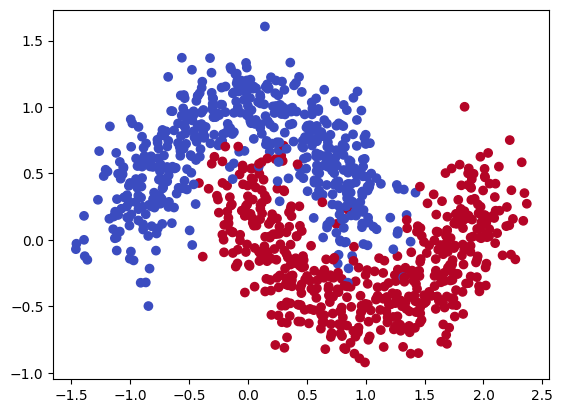

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')


### Regulate the Data
1. Rescale
2. Reshape

(1024, 2) (1024, 1)


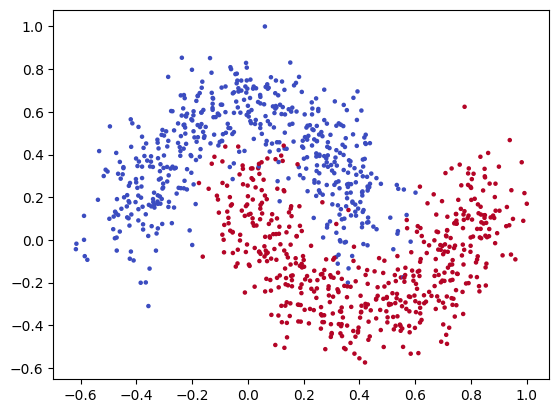

In [3]:
# Rescale 
# age_train_rescale = age_train / 10
# mileage_train_rescale = mileage_train / 1e4
# price_train_rescale = price_train / 1e4
# age_test_rescale = age_test / 10
# mileage_test_rescale = mileage_test / 1e4
# price_test_rescale = price_test / 1e4

# Rescale by max
X_train = X / X.max(axis=0)

# Reshape labels
y_train = y.reshape(-1, 1)
print(X_train.shape, y_train.shape)  # for debug

# Visualize
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')

## Create a Linear Model
A linear model: $\hat{y}=w_1x_1 + w_2x_2 + \dots + w_Nx_N + b$ can predict an entity's property based on its $N$ features. Represent the such a linear model in matrix format leads to:
 
$\hat{\mathbf{y}} = \mathbf{X} \cdot \mathbf{w}^T + \mathbf{b}$

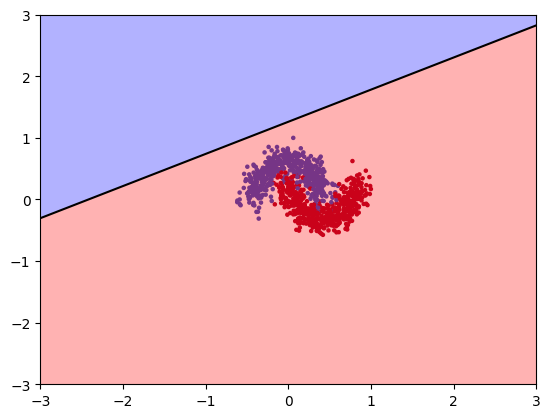

In [4]:
# Define model function
def linear(feature, weight, bias):
    """ Model function
    Args:
        input: feature matrix (independent variables), 2d-array with shape (samples #, features #)
        weight: row vector of weights, 2d-array with shape (1, # features)
        bias: scalar
    Returns:
        output: column vector of predictions (dependent variables), 2d-array with shape (# samples, 1)
    """
    pred = feature @ weight.T + bias
    return pred

# Sanity check
w_dummy = np.array([[1.2, -2.3]]) 
b_dummy = 3.4
y_pred_dummy = linear(X_train, w_dummy, b_dummy)


# Decision boundary
db_x = np.linspace(-3., 3.)
db_y = (0.5 - b_dummy - w_dummy[0, 0] * db_x) / w_dummy[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
plt.plot(db_x, db_y, 'k')
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-3., 3., 300),
                     np.linspace(-3., 3., 300))
zz = w_dummy[0, 0] * xx + w_dummy[0, 1] * yy + b_dummy - 0.5
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)



## Mean Squared Error (MSE) Loss Function
Define a MSE function to evaluate how good/bad the model was.

In [5]:
def mse_loss(pred, label):
    """ Mean Square Error function
    Args:
        prediction: column vector of predictions, 2d-array with shape (# samples, 1)
        label: column vector of ground truths, 2d-array with shape (# samples, 1)
    Returns:
        loss_value: scalar
    """
    loss_value = np.mean(0.5 * (pred - label) ** 2)
    return loss_value

# Sanity check
loss = mse_loss(pred=linear(X_train, w_dummy, b_dummy), label=y_train)
print(f"mse loss: {loss}")

mse loss: 4.202149428445785


## Gradient Descent Optimization

### Gradient Descent Iterations

initial parameters: w = [[-2.43544058e-05 -5.89066105e-05]], b = 2.639228814801344e-05
loss @ 1 iteration: 0.24998942700166832
loss @ 2 iteration: 0.2355263826885989
loss @ 3 iteration: 0.22247129327035994
loss @ 4 iteration: 0.2106788894450669
loss @ 5 iteration: 0.20001903672900667
loss @ 6 iteration: 0.19037515611651776
loss @ 7 iteration: 0.18164280958993362
loss @ 8 iteration: 0.17372843327193516
loss @ 9 iteration: 0.16654820280887114
loss @ 10 iteration: 0.16002701718231802
loss @ 11 iteration: 0.15409758858694012
loss @ 12 iteration: 0.1486996273031056
loss @ 13 iteration: 0.1437791116484085
loss @ 14 iteration: 0.13928763412730724
loss @ 15 iteration: 0.13518181582510405
loss @ 16 iteration: 0.13142278192274093
loss @ 17 iteration: 0.12797569195246927
loss @ 18 iteration: 0.12480931908041701
loss @ 19 iteration: 0.12189567329852594
loss @ 20 iteration: 0.11920966394252003
loss @ 21 iteration: 0.11672879743099368
loss @ 22 iteration: 0.11443290654919638
loss @ 23 iteration: 0.1

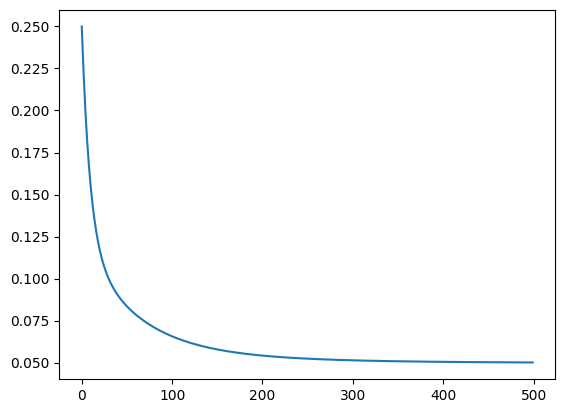

In [6]:
# Define gradient computation function
def grad(feature, pred, label):
    """ Gradient function
    Args:
        feature: feature matrix, 2d-array with shape (# samples, # features)
        pred: column vector of predictions, 2d-array with shape (# samples, 1)
        label: column vector of ground truths, 2d-array with shape (# samples, 1)
    Returns:
        dw: row vector of MSE loss partial derivatives w.r.t. weights, 2d-array with shape (1, # features)
        db: scalar of MSE loss partial derivatives w.r.t. bias
    """
    dw = 1 / label.shape[0] * ((pred - label).T @ feature)  # dL/dw
    db = (pred - label).mean()  # dL/db
    
    return dw, db

# Init parameters
w = np.random.normal(0, 1e-4, (1, 2)) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
# Gradient descent optimization
num_iters = 500
learning_rate = 0.05
losses = []
for i in range(num_iters):
    y_pred = linear(X_train, w, b)
    dw, db = grad(X_train, y_pred, y_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
print(f"final parameters: w = {w}, b = {b}")

# Observe the loss change
plt.plot(losses)

### Visualize Decision Boundary


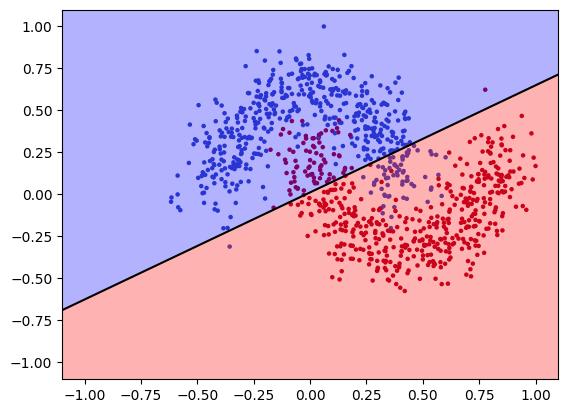

In [7]:
# Credit to ChatGPT
# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
                     np.linspace(-1.1, 1.1, 200))
zz = w[0, 0] * xx + w[0, 1] * yy + b - 0.5


bound_x = np.linspace(-1.1, 1.1)
bound_y = (0.5 - b - w[0, 0] * bound_x) / w[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
plt.plot(bound_x, bound_y, 'k')
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)



## Sigmoid Activation
A sigmoid function: $f(x) = 1 / (1 + e^{-x})$ will always output values within [0, 1]

initial parameters: w = [[ 4.97156471e-05 -3.02783081e-05]], b = -9.414733666988054e-06
loss @ 1 iteration: 0.12499779178394888
loss @ 2 iteration: 0.12359366700193368
loss @ 3 iteration: 0.12221702792458437
loss @ 4 iteration: 0.1208677569563392
loss @ 5 iteration: 0.11954569863207459
loss @ 6 iteration: 0.11825066238026516
loss @ 7 iteration: 0.11698242523501542
loss @ 8 iteration: 0.11574073448486154
loss @ 9 iteration: 0.11452531024819221
loss @ 10 iteration: 0.11333584796687116
loss @ 11 iteration: 0.11217202081118252
loss @ 12 iteration: 0.11103348199059082
loss @ 13 iteration: 0.10991986696603005
loss @ 14 iteration: 0.10883079556053106
loss @ 15 iteration: 0.10776587396597921
loss @ 16 iteration: 0.10672469664467923
loss @ 17 iteration: 0.10570684812520087
loss @ 18 iteration: 0.10471190469269516
loss @ 19 iteration: 0.10373943597451474
loss @ 20 iteration: 0.10278900642254551
loss @ 21 iteration: 0.10186017669416506
loss @ 22 iteration: 0.10095250493418981
loss @ 23 iteration:

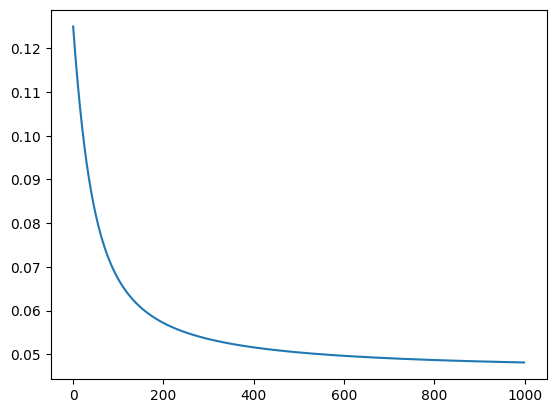

In [8]:
# Define ReLU function
def sigmoid(x):
    """ Sigmoid function
    Args:
        x: independent variable, could be an arrary of any shape or a scalar.
    Returns:
        y: dependent variable, could be an arrary of any shape or a scalar.
    """
    y = 1 / (1 + np.exp(-x))
    return y

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(feature, weight, bias):
    """ Model function
    Args:
        input: feature matrix (independent variables), 2d-array with shape (# samples, # features)
        weight: row vector of weights, 2d-array with shape (1, # features)
        bias: scalar
    Returns:
        output: column vector of predictions (sigmoid activated outcomes), 2d-array with shape (# samples, 1)
        Z: column vector of intermediate outputs, 2d-array with shape (# samples, 1)
    """
    Z = linear(feature, weight, bias)
    pred = sigmoid(Z)
    return pred

# Redefine gradient function. An exatra step to calculate dL/dZ will be added. 
def grad(feature, pred, label):
    """ Gradient function with sigmoid activation
    Args:
        feature: feature matrix, 2d-array with shape (# samples, # features)
        pred: column vector of predictions, 2d-array with shape (# samples, 1)
        label: column vector of ground truths, 2d-array with shape (# samples, 1)
        Z: column vector of intermediate outputs, 2d-array with shape (# samples, 1)
    Returns:
        dw: row vector of MSE loss partial derivatives w.r.t. weights, 2d-array with shape (1, # features)
        db: scalar of MSE loss partial derivatives w.r.t. bias
    """
    dZ = (pred - label) * pred * (1 - pred)
    dw = 1 / label.shape[0] * (dZ.T @ feature)
    db = dZ.mean()
    
    return dw, db

# Optimization with ReLU activation
w = np.random.normal(0, 1e-4, (1, 2)) 
b = np.random.normal(0, 1e-4)
print(f"initial parameters: w = {w}, b = {b}")
num_iters = 1000
learning_rate = 0.9
losses = []
for i in range(num_iters):
    y_pred = forward(X_train, w, b)
    dw, db = grad(X_train, y_pred, y_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    losses.append(loss)
print(f"final parameters: w = {w}, b = {b}")

# Observe loss values
plt.plot(losses)

### Visualize Sigmoid Function Activated Model Decision

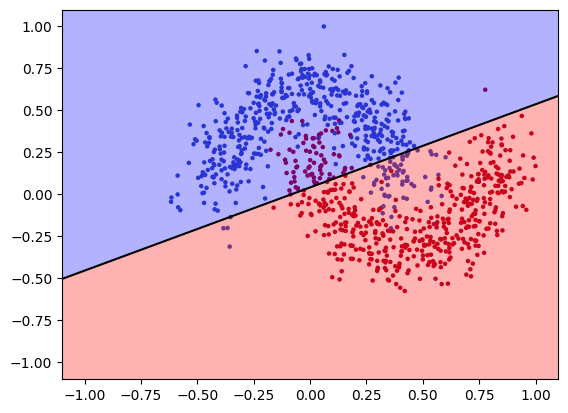

In [9]:
# # Credit to ChatGPT
# # Create a meshgrid of points over the feature space
# xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
#                      np.linspace(-1.1, 1.1, 200))
# zz = sigmoid(w[0, 0] * xx + w[0, 1] * yy + b) - 0.5


# # bound_x = np.linspace(-1.1, 1.1)
# # bound_y = (0.5 - b - w[0, 0] * bound_x) / w[0, 1]
# plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
# # plt.plot(bound_x, bound_y, 'k')
# plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)


# Create a meshgrid of points over the feature space
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 200),
                     np.linspace(-1.1, 1.1, 200))
zz = sigmoid(w[0, 0] * xx + w[0, 1] * yy + b) - 0.5


db_x = np.linspace(-1.1, 1.1)
db_y = (-b - w[0, 0] * db_x) / w[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], s=5*np.ones(y_train.size), c=y_train, cmap='coolwarm')
plt.plot(db_x, db_y, 'k')
plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.3)




## 